# Lab 05: K-Mean Clustering
## Sklearn

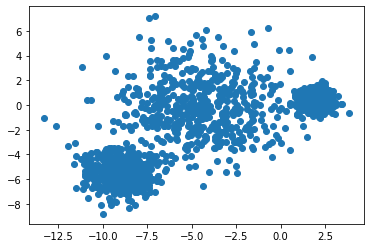

In [1]:
## data
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
X = data[["x1", "x2"]].values

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

Sum of squared distances of samples to their closest cluster center:  5747.987366346283


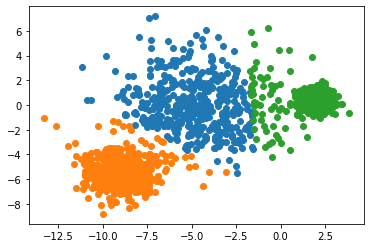

In [2]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)

## Bài tập
- Hãy cài đặt lại KMeans Cluster Algorithm mô tả trong Lec05_Unsupervised_KMeans, slide 14 của thầy. Chủ yếu dùng numpy để tính toán nhé.
- Hãy lưu lại tổng within-cluster-variation của mọi clusters sau mỗi vòng lặp để vẽ hình

Kết quả cuối cùng tương tự như:

<img src="fig.jpg" width="50%" height="50%">

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH5_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH5_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 11g59 thứ 4 ngày 24/06/2020. Nộp trễ bị chia đôi số điểm.

Import section

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [4]:
random.seed(0)

centroids = []

In [5]:
random_indices = random.sample(range(X.shape[0]), 3)
for i in random_indices:
    centroids.append(X[i])

In [6]:
assigned_centroids = [0] * len(X)

In [7]:
def compute_l2_distance(x, centroid):
    dist = 0
    
    for i in range(len(x)):
        dist += (centroid[i] - x[i])**2
        
    return dist

def get_closest_centroid(x, centroids):
    centroid_distances = []
    
    for centroid in centroids:
        dist = compute_l2_distance(x, centroid)
        centroid_distances.append(dist)

    closest_centroid_index =  min(range(len(centroid_distances)), key=lambda x: centroid_distances[x])
    
    return closest_centroid_index

def compute_sse(data, centroids, assigned_centroids):
    sse = 0
    
    for i,x in enumerate(data):

        centroid = centroids[assigned_centroids[i]]
                
        dist = compute_l2_distance(x, centroid)
        
        sse += dist
    
    sse /= len(data)
    return sse

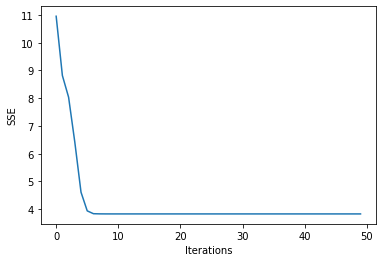

In [9]:
n_iters = 50

n_clusters = 3

n_centroid_dims = X.shape[1]

sse_list = []

for n in range(n_iters):
    for i in range(len(X)):
        x = X[i]
        closest_centroid = get_closest_centroid(x, centroids)
        assigned_centroids[i] = closest_centroid
    for c in range(len(centroids)):
        cluster_data = [X[i] for i in range(len(X)) if assigned_centroids[i] == c]
        new_centroid = [0] * len(centroids[0])
        for dim in range(n_centroid_dims): 
            dim_sum = [x[dim] for x in cluster_data]
            dim_sum = sum(dim_sum) / len(dim_sum)
            new_centroid[dim] = dim_sum
        centroids[c] = new_centroid
    sse = compute_sse(X, centroids, assigned_centroids)
    sse_list.append(sse)

plt.figure()
plt.xlabel("Iterations")
plt.ylabel("SSE")
plt.plot(range(len(sse_list)), sse_list)
plt.show()

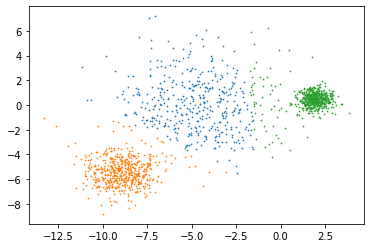

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

for c in range(len(centroids)):
        cluster_members = [X[i] for i in range(len(X)) if assigned_centroids[i] == c]    
        cluster_members = np.array(cluster_members)
        
        ax.scatter(cluster_members[:,0], cluster_members[:,1], s= 0.5)